In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#sys.path.append('C:\\Users\\elisa\\Documents\\git\\mplstereonet')
sys.path.append('../../..')
import mplstereonet
import gempy as gp
#from importlib import reload
import os
#sys.path.append('C:\\Users\\elisa\\Documents\\git\\remote-geomod')  # append local path to access rgeomod module
import pandas as pn

#import rgeomod

#import gdal
import skimage
import scipy
import linecache
from mpl_toolkits.mplot3d import Axes3D
from copy import copy

import seaborn as sns

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
../../../gempy/posterior_analysis.py:28: UserWarning: pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.")


- Model 1: fault orientation uncertain 
- Model 2: fault location of fault_NWSE equally likely within 200m 
- Model 3a-d: formation orientation
- Model 4a-d: formation and fault orientation
- Model 5a-d: formation and fault orientation, fault location

| Model num | fault pos | fault orient | form orient | path_i | path_o | remark |
|-----------|-----------|--------------|-------------|--------|--------| |
| 1 |-|y|-| ?  | Model1_Foliations  |faultsonly|
|-----------|-----------|--------------|-------------|--------|--------||
| 2 |y|-|-|  ? |  all_foliations ||
|-----------|-----------|--------------|-------------|--------|--------||
| 3a|-|-|y|all_points|Foliations_clust20_nf|save|
| 3b|-|-|y|all_points|Foliations_clust21_nf|save|
| 3c|-|-|y|all_points|Foliations_clust22_nf|save|
|-----------|-----------|--------------|-------------|--------|--------||
| 4a|-|y|y|all_points|Foliations_clust20|save|
| 4b|-|y|y|all_points|Foliations_clust21|save|
| 4c|-|y|y|all_points|Foliations_clust22|save|
|-----------|-----------|--------------|-------------|--------|--------||
| 5a|y|y|y|?|Foliations_clust20|
| 5b|y|y|y|?|Foliations_clust21|
| 5c|y|y|y|?|Foliations_clust22|

In [7]:
model_num, param = 1, 'a'

In [14]:
if model_num == 1:
    path_interf = 'all_points.csv'
    path_orient = 'all_foliations.csv'
    print('faults only')
    
elif model_num == 2:
    path_interf = None
    path_orient = 'all_foliations.csv'
    
elif model_num == 3:
    path_interf = 'all_points.csv'
    if param == 'a':
        path_orient = 'Foliations_clust20_nf.csv'
    elif param == 'b':
        path_orient = 'Foliations_clust21_nf.csv'
    elif param == 'c':
        path_orient = 'Foliations_clust22_nf.csv'
        
elif (model_num == 4) or (model_num == 5):
    if param == 'a':
        path_orient = 'Foliations_clust20.csv'
    elif param == 'b':
        path_orient = 'Foliations_clust21.csv'
    elif param == 'c':
        path_orient = 'Foliations_clust22.csv'
    
    if model_num == 4:
        path_interf = 'all_points.csv'
    if model_num == 5:
        path_interf = None

faults only


In [15]:
path_interf, path_orient

('all_points.csv', 'all_foliations.csv')

In [16]:
resolution = [50,50,50]
extent = np.array([777000, 794500, 6345000, 6353000, -1500, 1000])

In [128]:
geo_data = gp.create_data(extent = extent, resolution = resolution,
                        path_i = path_interf,
                        path_o = path_orient)

In [129]:
#sorting of lithologies
gp.set_series(geo_data,{'fault_NWSE':('fault_NWSE'),
                        'fault_NS':('fault_NS'),
                        'fault_NESW1':('fault_NESW1'),
                        'fault_NESW2':('fault_NESW2'),
                        'fault_NESW3':('fault_NESW3'),
                        'Trias_Series':('Liassic','Triassic'), 
                        'Carbon_Series':('Carboniferous'), 
                        'Basement_Series':('basement')},
             order_formations=['fault_NWSE','fault_NS',
                                'fault_NESW1','fault_NESW3','fault_NESW2',
                               'Liassic','Triassic','Carboniferous','basement'])

In [130]:
colordict = {'Liassic':'#015482', 'Triassic': '#9f0052', 'Carboniferous':'#ffbe00','basement':'#728f02',
            'fault_NWSE':'#2a2a2a','fault_NS':'#2a2a2a','fault_NESW2':'#939393','fault_NESW1':'#939393',
             'fault_NESW3':'#939393','fault_NESW4':'#939393' }
geo_data.set_colors(colordict)

,value,formation_number,color
fault_NWSE,1,1,#2a2a2a
fault_NS,2,2,#2a2a2a
fault_NESW1,3,3,#939393
fault_NESW3,4,4,#939393
fault_NESW2,5,5,#939393
Liassic,6,6,#015482
Triassic,7,7,#9f0052
Carboniferous,8,8,#ffbe00
basement,9,9,#728f02


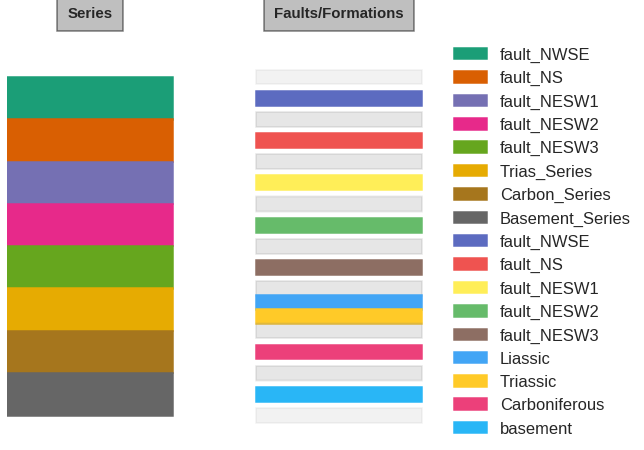

In [131]:
gp.get_sequential_pile(geo_data)

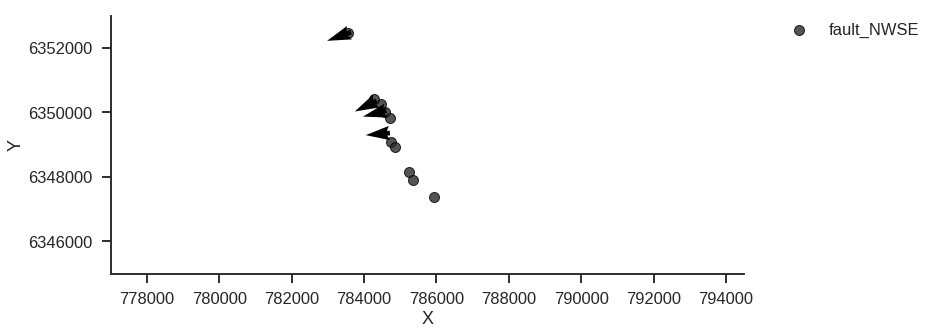

In [132]:
gp.plotting.plot_data(geo_data,direction='z',data_type='all',series='fault_NWSE')
#plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\clusteredorient_only.png", format='png', dpi=1000)

### Moving fault data:

In [133]:
# Initial data
x_i = geo_data.interfaces[geo_data.interfaces['formation'] == 'fault_NWSE']['X']
y_i = geo_data.interfaces[geo_data.interfaces['formation'] == 'fault_NWSE']['Y']

x_o = geo_data.orientations[geo_data.orientations['formation'] == 'fault_NWSE']['X']
y_o = geo_data.orientations[geo_data.orientations['formation'] == 'fault_NWSE']['Y']
angle = 45

In [135]:
for i in range(5):
    distance = np.random.normal(0, 1000)
    # Changing the dataframes:

    geo_data.interfaces['X']  = x_i.apply(lambda x: x + distance * np.cos(angle * np.pi / 180))
    geo_data.interfaces['Y']  = y_i.apply(lambda x: x + distance * np.sin(angle * np.pi / 180))

    geo_data.orientations['X'] = x_o.apply(lambda x: x + distance * np.cos(angle * np.pi / 180))
    geo_data.orientations['Y'] = y_o.apply(lambda x: x + distance * np.sin(angle * np.pi / 180))
   # gp.plotting.plot_data(geo_data,direction='z',data_type='all',series='fault_NWSE')
    # You need to use interp_data.update_interpolator(geo_data) before computing!!!!!!!!!!!!!!!!!!

In [10]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float32',theano_optimizer='fast_run')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_run
Device:  cuda
Precision:  float32
Number of faults:  5


### Choosing which series a fault offsets

In [11]:
faults1=['fault_NESW1',
 'fault_NESW2',
 'fault_NESW3']
faults2=['fault_NS',
 'fault_NWSE']

In [12]:
geo_data.faults_relations.loc[faults1,['Trias_Series']] = True
geo_data.faults_relations.loc[faults2,['Trias_Series']] = True
geo_data.faults_relations.loc[faults2,['Carbon_Series']] = True
geo_data.faults_relations

,fault_NWSE,fault_NS,fault_NESW1,fault_NESW2,fault_NESW3,Trias_Series,Carbon_Series,Basement_Series
fault_NWSE,False,False,False,False,False,True,True,False
fault_NS,False,False,False,False,False,True,True,False
fault_NESW1,False,False,False,False,False,True,False,False
fault_NESW2,False,False,False,False,False,True,False,False
fault_NESW3,False,False,False,False,False,True,False,False
Trias_Series,False,False,False,False,False,False,False,False
Carbon_Series,False,False,False,False,False,False,False,False
Basement_Series,False,False,False,False,False,False,False,False


In [13]:
interp_data.update_interpolator(geo_data)

CPU 1 core = 2,63

GPU = ,12

In [15]:
lith_block, fault_block = gp.compute_model(interp_data)

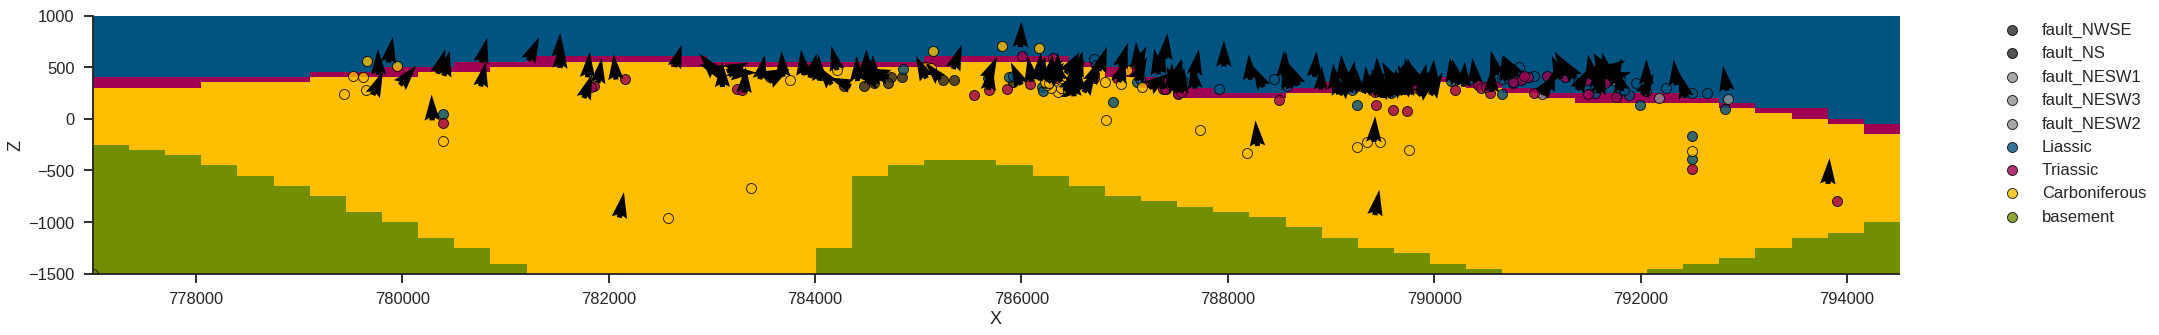

In [16]:
gp.plot_section(geo_data, lith_block[0], 25, plot_data=True)

## Adding topography

In [17]:
topo_plotting = np.load('topo_plotting.npy')

../../../gempy/utils/topography.py:24: UserWarning: gdal package is not installed. No support for raster functions
  warnings.warn("gdal package is not installed. No support for raster functions")


Define path to raster file
(50, 50)


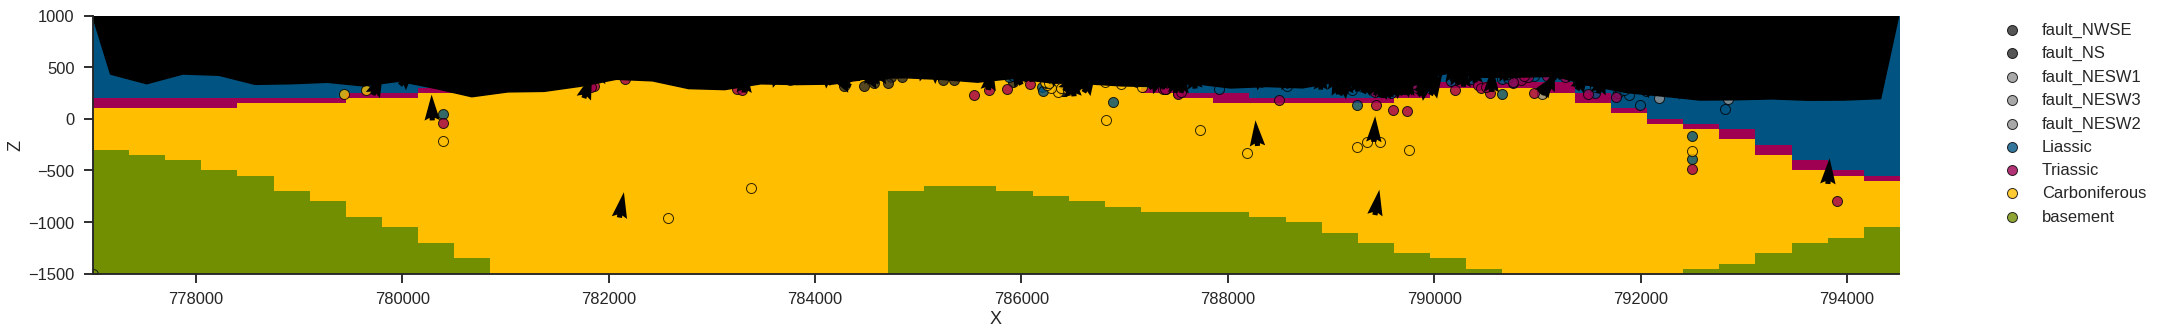

In [18]:
from gempy.utils import topography
elevation = topography.DEM(xyzarray=topo_plotting, geodata=geo_data)#,output_path = folder,interpdata=interp_data)
gp.plot_section(geo_data, lith_block[0], 18, plot_data=True, topography=elevation)

#### GeologicalMap

In [19]:
# We stack the topograghy and the regular grid values
topo_data = np.load('surface_coordinates.npy')
x_to_int = np.vstack((topo_data, geo_data.grid.values))

In [20]:
lith_complete, _ = gp.compute_model_at(x_to_int, interp_data)
lith_map = lith_complete[0][:320*700]
lith_mesh = lith_complete[0][320*700:]

##### Plot section of the mesh

(50, 50)


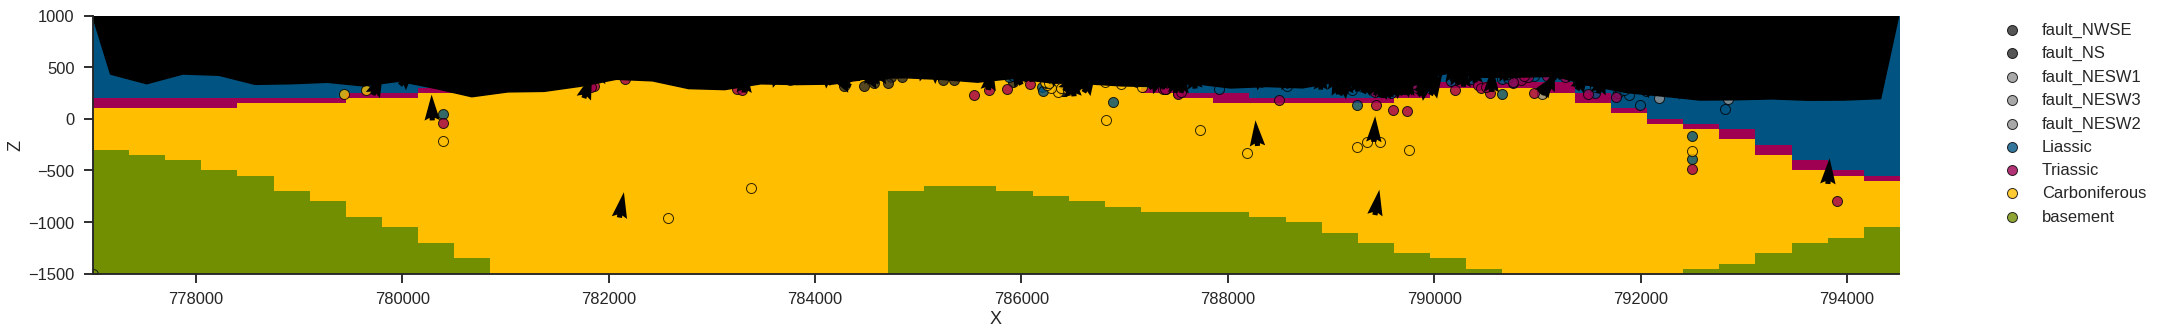

In [21]:
gp.plot_section(geo_data, lith_mesh, 18, plot_data=True, topography=elevation)

##### Plot geological map

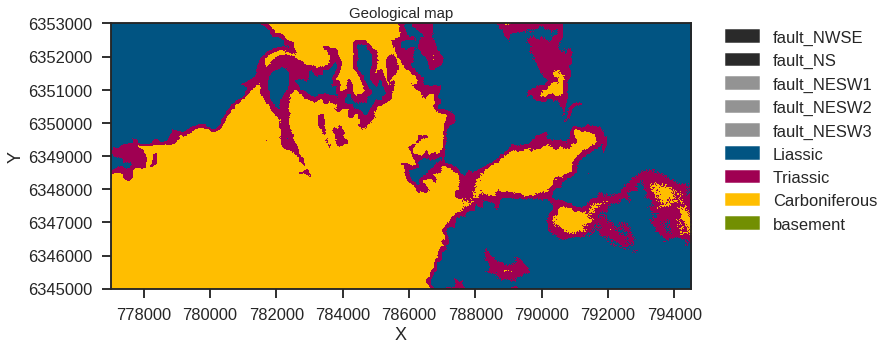

In [22]:
gp.plotting.plot_map(geo_data, geomap=lith_map.reshape(320,700))


### Creating vMF distributions for each orientation

In [23]:
import gempy.utils.fishdist as fish
vMF_list = []
for e, i in geo_data.orientations[['G_x', 'G_y', 'G_z', 'kappa']].iterrows():
   # print(i[['G_x', 'G_y', 'G_z']].values)
    vMF_list.append(fish.vMF('vMF_' + str(e), mean=i[['G_x', 'G_y', 'G_z']].values, kappa=i['kappa']))
    

for some purposes spherecluster package would be good (or I copy the respective file?!


The next two cells are the ones we need to loop

In [24]:
# Now we can sample by calling the following
new_orientations = np.vstack(list(map(lambda x: x.sample(num_samples=1, direct_output=True)[0], vMF_list) ))
# Modifing the rescale dataframe
interp_data.geo_data_res.orientations[['G_x', 'G_y', 'G_z']] = new_orientations
interp_data.geo_data_res.calculate_orientations()
# Preparing the rescale data for theano because of the stupid basement
# shame on me that this is the librarz

In [26]:
interp_data.update_interpolator(geo_data)
lith_complete, _ = gp.compute_model_at(x_to_int, interp_data)
lith_map = lith_complete[0][:320*700]
lith_mesh = lith_complete[0][320*700:]

272 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### first iteration initializes lithology probability arrays

In [ ]:
### get number of different lithologies
lith_id = np.unique(np.round(lith_mesh).astype(int))

### round blocks
block_map  = np.round(lith_map).astype(int)
block_mesh  = np.round(lith_mesh).astype(int)

### create one array for every lithology to count frequency
count_map = np.zeros((len(lith_id), block_map.shape[0]))
count_mesh = np.zeros((len(lith_id), block_mesh.shape[0]))

#### Probability field function and loop

In [ ]:
n_iter = 10

In [ ]:
for i in range(0,num_iterations):
    # Now we can sample by calling the following
    new_orientations = np.vstack(list(map(lambda x: x.sample(num_samples=1, direct_output=True)[0], vMF_list)))
    # Modifing the rescale dataframe
    interp_data.geo_data_res.orientations[['G_x', 'G_y', 'G_z']] = new_orientations
    interp_data.geo_data_res.calculate_orientations()
    
    interp_data.update_interpolator(geo_data)
    lith_complete, _ = gp.compute_model_at(x_to_int, interp_data)
    lith_map = lith_complete[0][:320*700]
    lith_mesh = lith_complete[0][320*700:]
    
    # update probability fields
    block_map  = np.round(lith_map).astype(int)
    block_mesh  = np.round(lith_mesh).astype(int)
    
    for i, l_id in enumerate(lith_id): #enumerate through all outcomes
        count_map[i][block_map == l_id] += 1 #sum up frequency
        count_mesh[i][block_mesh == l_id] += 1 

prob_map = count_map/n_iter
prob_mesh = count_mesh/n_iter


In [ ]:
def calculate_ie_masked(self, prob):
    ie = np.zeros_like(prob[0])
    for l in prob:
        pm = np.ma.masked_equal(l, 0)  # mask where prob is 0
        ie -= (pm * np.ma.log2(pm)).filled(0)
return ie